<a href="https://colab.research.google.com/github/insooAI/My-Portfolio/blob/main/text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import nltk
import numpy as np
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import re 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from math import log

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# df = pd.read_csv('/content/drive/My Drive/데이터/text analysis/TRAIN.csv',encoding='UTF-8')
# df

,Unnamed: 0,User,Post,Label,LabelNumber
0,5,user-5,"['Since I dont know what DBT is, would you min...",Supportive,4.0
1,116,user-116,['I didnt... I always feel as though Im a fail...,Ideation,2.0
2,45,user-45,['Thanks for this. I was working with my dad t...,Ideation,2.0
3,16,user-16,"['oh, doh.I had someone tell me similar recent...",Ideation,2.0
4,462,user-462,['I know the feeling of not wanting to be a bu...,Ideation,2.0
...,...,...,...,...,...
345,106,user-106,['Im sure you hear this all the time but where...,Ideation,2.0
346,270,user-270,"['Man, I know what you mean.Its that proverbia...",Indicator,3.0
347,348,user-348,"['Im glad you started the fight started early,...",Ideation,2.0
348,435,user-435,"['Hey, just happened to browse through this an...",Indicator,3.0


# load Data

##자살 위험수준 설명

---



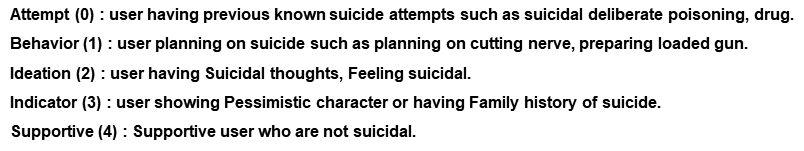

In [ ]:
# train, test data
df = pd.read_csv('/content/drive/My Drive/데이터/text analysis/TRAIN.csv',encoding='UTF-8')[['Post','Label']]  
tdf = pd.read_csv('/content/drive/My Drive/데이터/text analysis/TEST.csv',encoding='UTF-8')

In [ ]:
# test의 label은 모르는 상태
tdf["Label"] = 'Unknown'

In [ ]:
df = pd.concat([df,tdf],axis=0)

In [ ]:
df

,Post,Label
0,"['Since I dont know what DBT is, would you min...",Supportive
1,['I didnt... I always feel as though Im a fail...,Ideation
2,['Thanks for this. I was working with my dad t...,Ideation
3,"['oh, doh.I had someone tell me similar recent...",Ideation
4,['I know the feeling of not wanting to be a bu...,Ideation
...,...,...
145,['I completely understand how you feel. Ive h...,Unknown
146,['Try and get her to seek a therapist.They wil...,Unknown
147,"['Okay, were still here, so let us know!', 'Wh...",Unknown
148,['I dont Hyperactive behavior opiates. They ju...,Unknown


In [ ]:
posts = df["Post"].values.tolist()
labels = df["Label"].values.tolist()

# Data Preprocessing
- html 태그 제거
- 특수기호 제거
- URL 제거
- 소문자로 통일
- **최종 함수 : prep**

In [ ]:
def cleanHtml(raw_html):                                                                                      
    cleanr = re.compile('<.*?>')                                                                              
    cleantext = re.sub(cleanr, '', raw_html)                                                                  
    return cleantext                                                                                          
                                                                                                              
def etcRemove(x) :                                                                                         
    return re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣${3}#{3}| |,|.|!|?|`|\']', "",x)                                               
                                                                                                                                                                                                                                                                                                                                                                                              
def removeURL(x) :                                                                                                                                                                                                                                                                                                                                                                            
    return re.sub("(https|http|ftp|telnet|news|mms)?://(\w*:\w*@)?[-\w.]+(:\d+)?(/([\w/_.]*(\?\S+)?)?)?","",x)

def tolower(x) :                                                                                                                                                                                                                                                                                                                                                                              
    try :                                                                                                                                                                                                                                                                                                                                                                                     
        return x.lower()                                                                                                                                                                                                                                                                                                                                                                      
    except :                                                                                                                                                                                                                                                                                                                                                                                  
        return "" 


# 최종 함수
def prep(x) :
    
    return tolower(etcRemove(cleanHtml(removeURL(x))))



In [ ]:
# list comprehension
posts = list( prep(x) for x in posts ) 

## 토큰화 ...> 품사 추출

In [ ]:
def tokenize(line) :
    return nltk.word_tokenize(line)


# 동사와 명사만 추출 (토큰, 품사)
def extract(lines) :
    tokens = list( nltk.pos_tag(tokenize(line)) for line in lines)  
    return list( list( (x[0],x[1]) for x in y if x[1][:2] == "NN" or x[1][:2] == "VB" ) for y in tokens )


In [ ]:
tokens = extract(posts)

## 원형 복원

In [ ]:
# 원형 복원
lemmatizer = WordNetLemmatizer()
tokens = list( list(lemmatizer.lemmatize(word,'v') for word,tag in x) for x in tokens)


## 불용어 제거

In [ ]:
def remove_stopwords(x): 
    stops= set(stopwords.words('english'))

    mystops = ["shed","dont","didnt","youre","im","its","wentare","shes","hes"]

    stops = list(stops) + mystops

    no_stops = [word for word in x if not word in stops]
    return list(no_stops)


tokens = list(remove_stopwords(x) for x in tokens )

## calculate the frequency of words 
- 2번 이상 출현하는 단어만 남기기

In [ ]:
# make dictionary
def count_words(posts) :
    d = {} 

    for p in posts : 
        for w in p :
            try :
                d[w] += 1   
            except :
                d[w] = 1

    return d

In [ ]:
word_count = count_words(tokens)

In [ ]:
tokens = list( list( x for x in y if word_count[x] > 1) for y in tokens)

In [ ]:
word_count = count_words(tokens)

In [ ]:
# 확인
sorted(word_count.items(), key=lambda x: x[1], reverse=False)

[('metabolism', 2),
 ('mike', 2),
 ('flicker', 2),
 ('tiptoe', 2),
 ('hungry', 2),
 ('time.the', 2),
 ('treadmill', 2),
 ('job.i', 2),
 ('mumble', 2),
 ('slowly', 2)]

## 전처리된 토큰들과 label을 묶어주기

In [ ]:
dataset = list(zip(tokens,labels))

##  TF-IDF 구현

In [ ]:
# dataset에 있는 모든 단어 집합
totalnouns = list(set(sum(list( x[0] for x in dataset ),[])))

In [ ]:
label_score = {
        "Supportive" :4,
        "Behavior" : 1,
        "Ideation": 2,
        "Indicator": 3,
        "Attempt"  : 0,
        "Unknown" : -1
    }

In [ ]:
# label 값 숫자로 맵핑
dataset = list( (x[0],label_score[x[1]]) for x in dataset )

In [ ]:
def make_vocab_dict(tnouns) :
  idx = 0
  word_idx_dict = {}
  idx_word_dict = {}

  for nouns in tnouns :
    word_idx_dict[nouns] = idx
    idx_word_dict[idx] = nouns
    idx += 1

  return word_idx_dict,idx_word_dict

wi,iw = make_vocab_dict(totalnouns)
total_noun_cnt = len(wi.items())

def encode_post(post,total_noun_cnt,wi) :
  bow = [ 0 for _ in range(total_noun_cnt) ]

  for w in post :
    idx = wi[w]
    bow[idx] +=  1

  return bow

def encode_all_post(dataset,total_noun_cnt,wi) :

  bows = []

  for post,label in dataset :
    bow = encode_post(post,total_noun_cnt,wi)
    bows.append(bow)

  return bows


bows = encode_all_post(dataset,total_noun_cnt,wi)

In [ ]:
def count_word_for_post(post) :
  d = {}
  for w in post :
    try :
      d[w] += 1
    except :
      d[w] = 1

  return d

def make_df(bows,word_count) :
  df = {}

  for i in range(word_count) : 
    df[i] = 0

    for d in bows :
      if d[i] > 0 :
        df[i] += 1

  return df



def tf_idf(bows,word_count,df) :
  nd = len(bows)
  
  idf_scores = [ [0 for _ in range(word_count)] for x in range(len(bows)) ]
  doc_idx = 0

  for d in bows :
    tcnt = sum(d)
    
    for word_idx in range(word_count) :
      mother = 1 + df[word_idx]  
      son = nd
      idf_scores[doc_idx][word_idx] = (log(son/mother)+1) * (d[word_idx]/tcnt)
       
    doc_idx += 1
     
  return idf_scores

df = make_df(bows,total_noun_cnt)
tf_idf_array = tf_idf(bows,total_noun_cnt,df)


# Modeling

In [ ]:
class LinearModel :
    def __init__(self) :
        pass

    def initW(self,pcodes) :
        a = []
        wa = []
        tw = np.sum(pcodes)

        return np.ones(len(pcodes[0])) / tw
       

    def initB(self,pcodes) :
        return -2

    def gradfn(self,xp,s) :
        return -self.X[xp] * 0.000001 * s     #가중치 행렬에 대한 학습률

    def _train(self,xp) :
        loss = self.L[xp]

        gd = self.gradfn(xp,loss)

        self.w += gd
        self.b -= loss * 0.000001    #bias에 대한 학습률
       # print(self.L[xp])

    def train(self) :
        for i in range(len(self.X)) :
            self._train(i)
            print(np.sum(self.L))

    def run(self,x,y,di,dd,mc,epoch) :
        X = np.array(x)
        Y = y

        self.X = X

        self.w = self.initW(X)
        self.Y = Y  
        self.b = self.initB(X)

        for _ in range(epoch) :
            self.P = np.matmul(X,self.w.T) + self.b  
            self.L = self.P - self.Y  

            self.train()
        
        return self.w,self.b

    def predict(self,x,dd,mc)  :
        X = np.array(x)

        P = np.matmul(X,self.w.T) + self.b
        predicts = []

        for i in range(len(X)) :
            p = min(int(P[i]+0.5),4)
            predicts.append(p)

        return predicts



## train_test_split

In [ ]:
model = LinearModel()

train_x = list( list(y*60  for y in x) for x in tf_idf_array[:200] )
train_y = list( x[1] for x in dataset[:200] )

test_x = list( list(y*60  for y in x) for x in tf_idf_array[200:350] )
test_y = list( x[1] for x in dataset[200:350] )


## fitting

In [ ]:
# 모델 피팅
model.run(train_x,train_y,wi,iw,total_noun_cnt,epoch=2000)


In [ ]:
# y 값 예측
pred_y = model.predict(test_x,iw,total_noun_cnt)
print(pred_y)

pd.DataFrame(pred_y).to_csv("2015318434.csv",index=False)

[2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 1, 1, 2, 2, 2, 3, 2, 2, 1, 1, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 3, 2, 2, 2, 1, 2, 2, 3, 2, 2, 3, 2, 2, 3, 1, 2, 3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 0, 2, 1, 2, 2, 2, 1, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 1, 3, 2, 2, 3, 2, 1, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 3, 2]


# Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
def get_clf_eval(test,pred):
  confusion = confusion_matrix(test,pred)
  accuracy = accuracy_score(test,pred)

  print(confusion)
  print('\n')
  print(f'accuracy : {accuracy}')

get_clf_eval(test_y,pred_y)

[[ 0  2  6  2  0]
 [ 0  7 15  1  0]
 [ 0  5 43 10  0]
 [ 0  1 23  5  0]
 [ 1  3 13 13  0]]


accuracy : 0.36666666666666664


## 실제 예측 값

In [ ]:
# 실제 test 셋에 적용
# test 셋 답지는 없으므로 실제로 정확도 계산하기는 무리 
model = LinearModel()

train_x = list( list(y*60  for y in x) for x in tf_idf_array[:350] )
train_y = list( x[1] for x in dataset[:350] )

test_x = list( list(y*60  for y in x) for x in tf_idf_array[350:] )
test_y = list( x[1] for x in dataset[350:] )

pred_y = model.predict(test_x,iw,total_noun_cnt)
print(pred_y)